# process-and-save-images.ipynb

This notebook is for processing images by dividing or subtracting previous images. The Python package [napari](https://napari.org/) is used to visualize the image stacks. Installation instructions available [here](https://napari.org/#installation).

## Import packages

In [39]:
# Standard-library imports
from pathlib import Path
# Third-party imports
import napari
import numpy as np
# Local imports
import helpers
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Open napari window

In [40]:
viewer = napari.Viewer()

## Load images

21 image(s) loaded.
Image numbers: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110]


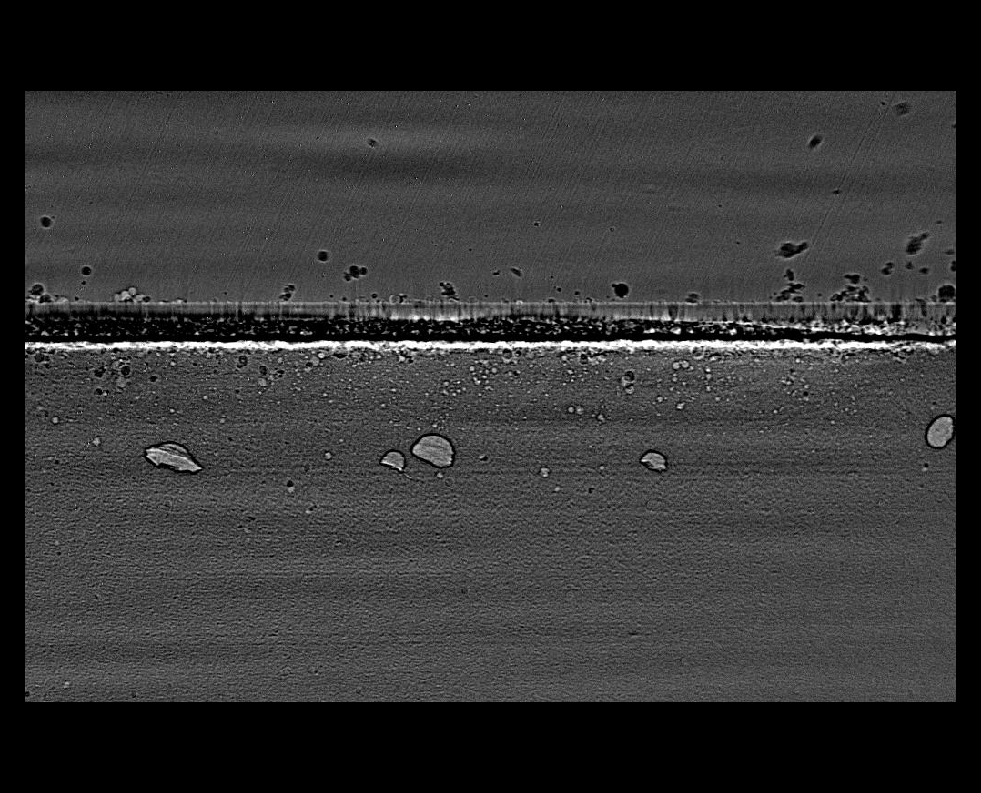

In [41]:
data_dir_path = Path(r'C:\Users\gusb\Downloads\Result of s19_C001H001S0019')
img_start = 90
img_stop = 110
step = 1
img_nums, imgs = helpers.load_images(
    data_dir_path, start=90, stop=110, step=1, file_suffix='.png'
)
print(f'{len(imgs)} image(s) loaded.')
print(f'Image numbers: {img_nums}')
viewer.add_image(imgs)
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Process images

Smoothing images...
Processing images by subtracting previous...


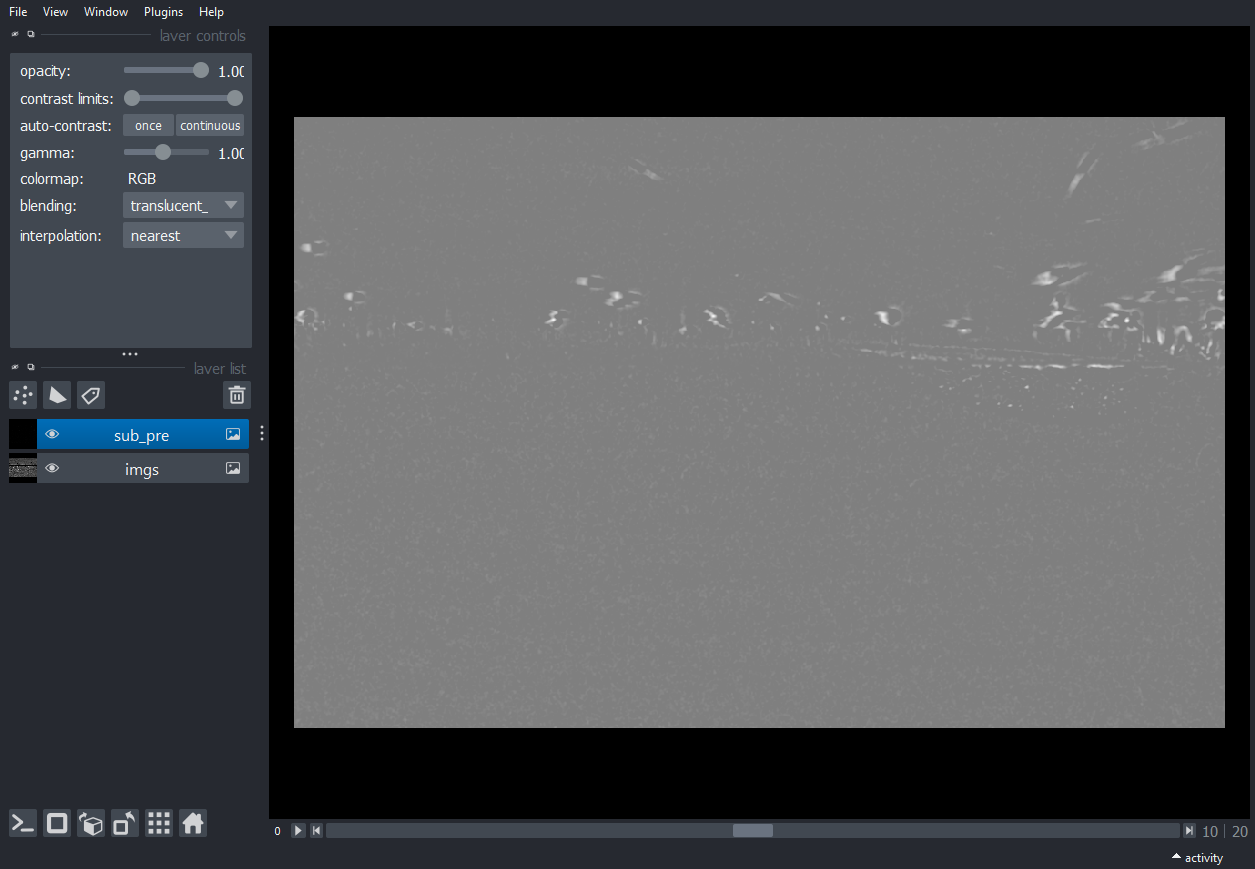

In [42]:
# processing_method can be sub_pre, sub_first, div_by_pre, or div_by_first
processing_method = 'sub_pre'
processed_imgs = helpers.process_images(imgs, method=processing_method)
viewer.add_image(processed_imgs, name=processing_method)
napari.utils.nbscreenshot(viewer, canvas_only=False)

Adjusting contrast...
Converting to 16-bit images...


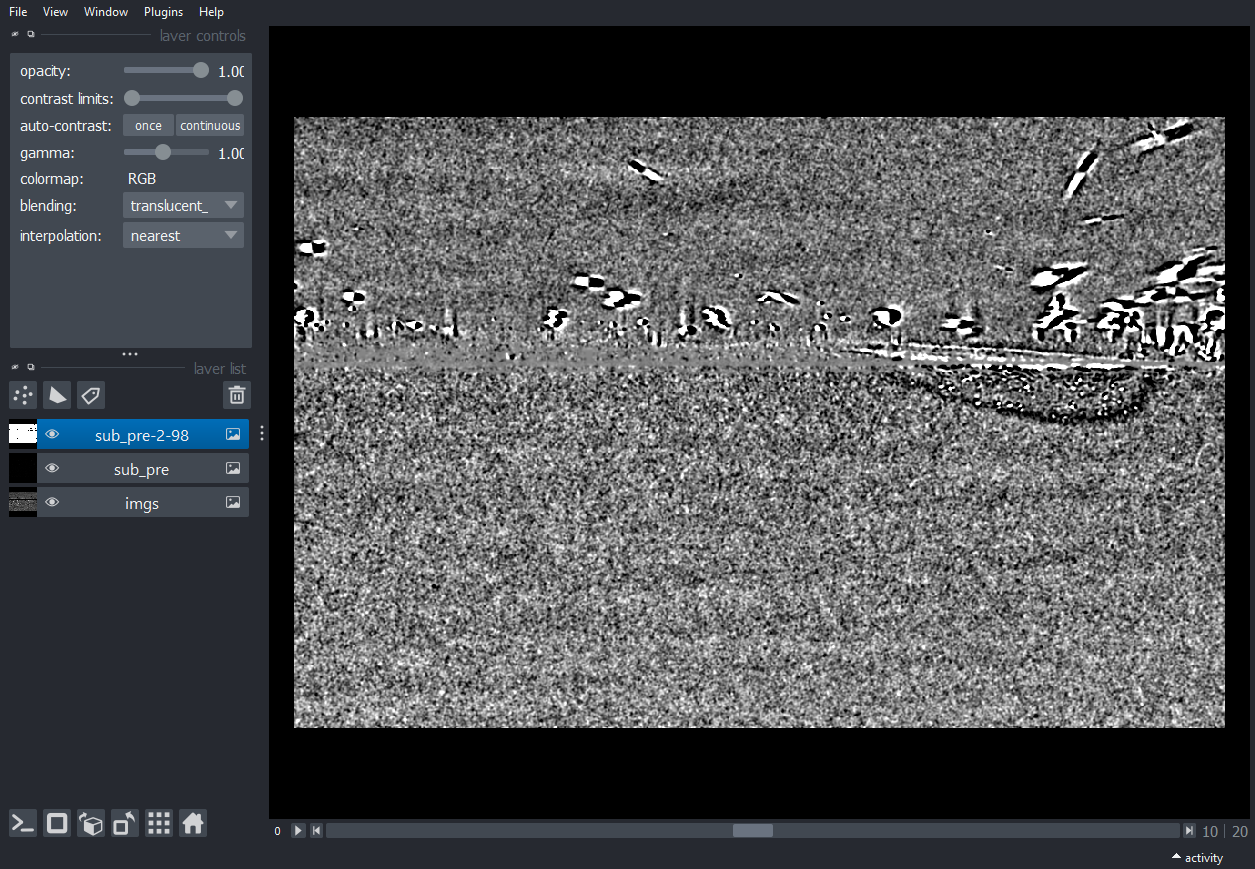

In [43]:
low_percentile = 2
high_percentile = 98
processed_imgs_rescaled = helpers.rescale_contrast(
    processed_imgs, low=low_percentile, high=high_percentile
)
viewer.add_image(
    processed_imgs_rescaled,
    name=f'{processing_method}-{low_percentile}-{high_percentile}'
)
napari.utils.nbscreenshot(viewer, canvas_only=False)

## Save images

In [53]:
run_this_cell = True
if run_this_cell:
    save_dir_path = Path(
        f'{data_dir_path.parent}/{data_dir_path.stem}-{processing_method}'
        f'-{low_percentile}-{high_percentile}'
    )
    helpers.save_images(
        save_dir_path, processed_imgs_rescaled, num_offset=img_start,
        file_suffix='.tif'
    )

Saving images...
21 image(s) saved to:
C:\Users\gusb\Downloads\Result of s19_C001H001S0019-sub_pre-2-98
